In [1]:
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
import numpy as np
import sklearn

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
x_train.min(), x_train.max()

(0, 255)

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

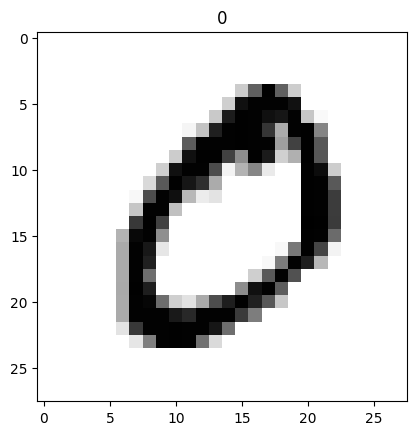

In [7]:
idx = 1
img = x_train[idx]
label = y_train[idx]

# Plot image with class label
plt.imshow(img, cmap="binary")
plt.title(f"{label}")
plt.show()

In [24]:

import tensorflow as tf
from tensorflow import keras
from keras import layers, models
def build_model():
  # Create a sequential model
  model = models.Sequential()
  # Add Convolutional layers
  model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28,1)))
  model.add(layers.MaxPooling2D((3, 3)))
  model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(14, 14,1)))
  model.add(layers.MaxPooling2D((3, 3)))
  model.add(layers.Conv2D(32, (2, 2), activation='relu',input_shape=(7, 7,1)))
  # Flatten the output for dense layers
  model.add(layers.Flatten())
  # Add Dense layers
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(.2))
  model.add(layers.Dense(10,activation='softmax'))
  return model
model = build_model()
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 8, 8, 8)           0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 6, 6, 16)          1168      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 2, 2, 16)          0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 1, 1, 32)          2080      
                                                                 
 flatten_3 (Flatten)         (None, 32)               

In [26]:
from keras import optimizers
opt = optimizers.SGD(learning_rate=0.01)
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])

In [27]:
from sklearn.model_selection import train_test_split
# Split into 80% training and 20% validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)
print(x_train.shape)
print(x_val.shape)

(38400, 28, 28)
(9600, 28, 28)


In [28]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10)

Epoch 1/10
1200/1200 [==============================] - 16s 13ms/step - loss: 0.4746 - acc: 0.8471 - val_loss: 0.1549 - val_acc: 0.9524
Epoch 2/10
1200/1200 [==============================] - 15s 12ms/step - loss: 0.1559 - acc: 0.9505 - val_loss: 0.1188 - val_acc: 0.9656
Epoch 3/10
1200/1200 [==============================] - 15s 12ms/step - loss: 0.1213 - acc: 0.9620 - val_loss: 0.0990 - val_acc: 0.9701
Epoch 4/10
1200/1200 [==============================] - 14s 12ms/step - loss: 0.1010 - acc: 0.9685 - val_loss: 0.0867 - val_acc: 0.9723
Epoch 5/10
1200/1200 [==============================] - 16s 13ms/step - loss: 0.0886 - acc: 0.9721 - val_loss: 0.0797 - val_acc: 0.9760
Epoch 6/10
1200/1200 [==============================] - 16s 13ms/step - loss: 0.0775 - acc: 0.9761 - val_loss: 0.0802 - val_acc: 0.9757
Epoch 7/10
1200/1200 [==============================] - 15s 13ms/step - loss: 0.0710 - acc: 0.9773 - val_loss: 0.0699 - val_acc: 0.9792
Epoch 8/10
1200/1200 [==========================

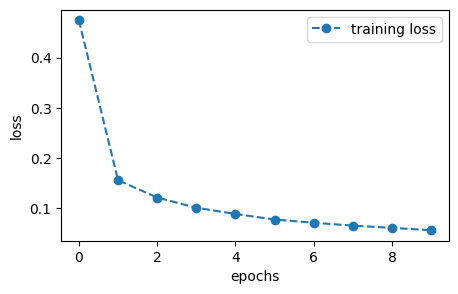

In [29]:
# Plot accuracy
plt.figure(figsize=(5, 3))
plt.plot(history.history["loss"],linestyle='dashed', marker='o',label="training loss")
plt.xlabel("epochs")
plt.ylabel('loss')
plt.legend()
plt.show()

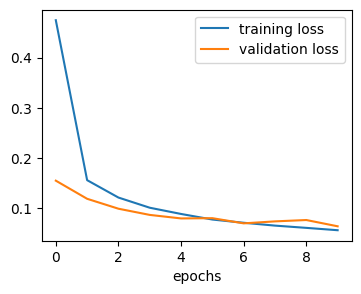

In [30]:
# Plot loss
plt.figure(figsize=(4, 3))
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.xlabel("epochs")
plt.show()

In [31]:
# Get accuracy for test dataset
test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc *= 100

print(f"Test accuracy: {test_acc:.2f}%")

313/313 [==============================] - 2s 5ms/step - loss: 0.0506 - acc: 0.9829
Test accuracy: 98.29%
